In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng

from simulator.objects.market import Market
from simulator.objects.participant import Participant
from simulator.objects.policies.base_policy import BasePolicy
from simulator.objects.policies.ml_policy import MLPolicy, PassiveAggressivePolicy
from simulator.objects.policies.nn_policy import NNPolicy
from simulator.objects.stock import Portfolio, Stock, StockHolding

rng = default_rng()

In [2]:
def generate_stocks(n_stocks: int) -> list[Stock]:
    output: list[Stock] = []
    for _ in range(n_stocks):
        output.append(
            Stock(
                cash=rng.uniform(-10000, 100000, size=1)[0],
                earning_value_of_assets=rng.uniform(10000, 30000, size=1)[0],
                latest_quarterly_earnings=rng.uniform(10000, 30000, size=1)[0],
                price_history=np.ones(shape=(1825,)) * rng.uniform(10, 200, size=1)[0],
                quality_of_leadership=rng.uniform(0, 1, size=1)[0],
                stock_volatility=rng.uniform(0, 0.1, size=1)[0],
            )
        )
    return output

In [3]:
def generate_portfolio(stocks: list[Stock]) -> Portfolio:
    stock_holdings: list[StockHolding] = []
    for stock in stocks:
        stock_quantity: int = rng.choice(a=np.array([0, 0, 0, 1, 2, 3]), size=1)[0]
        if stock_quantity > 0:
            stock_holdings.append(
                StockHolding(
                    stock=stock,
                    stock_quantity=stock_quantity,
                )
            )
    return Portfolio(stock_holdings=stock_holdings)

In [4]:
def generate_participants(
    n_participants: int, stock_list: list[Stock], market: Market, policy: BasePolicy
) -> list[Participant]:
    output: list[Participant] = []
    for _ in range(n_participants):
        output.append(
            Participant(
                stock_portfolio=generate_portfolio(stock_list),
                policy=policy,
                cash=3000,
            )
        )
    return output

In [5]:
N_STOCKS = 100
N_PARTICIPANTS = 50

market = Market(stocks=generate_stocks(N_STOCKS), interest_rate_apy=0.03)

In [6]:
market.add_participants(
    [
        generate_participants(
            1,
            market.stocks,
            market,
            NNPolicy(
                market=market,
                n_stocks_to_sample=30,
                max_stocks_per_timestep=10,
                valuation_model_path=Path("model2.pt"),
                valuation_model_noise_std=0.05,
            ),
        )[0]
        for _ in range(50)
    ]
)

market.add_participants(
    [
        generate_participants(
            1,
            market.stocks,
            market,
            NNPolicy(
                market=market,
                n_stocks_to_sample=30,
                max_stocks_per_timestep=10,
                valuation_model_path=Path("model_high_prices.pt"),
                valuation_model_noise_std=0.05,
            ),
        )[0]
        for _ in range(50)
    ]
)

market.add_participants(
    [
        generate_participants(
            1,
            market.stocks,
            market,
            MLPolicy(
                market=market,
                n_stocks_to_sample=50,
                max_stocks_per_timestep=10,
                valuation_model_path=Path("random_forest_regressor.pkl"),
            ),
        )[0]
        for _ in range(10)
    ]
)

market.add_participants(
    [
        generate_participants(
            1,
            market.stocks,
            market,
            PassiveAggressivePolicy(
                market=market,
                n_stocks_to_sample=50,
                max_stocks_per_timestep=10,
                valuation_model_path=Path("passive_aggressive.pkl"),
            ),
        )[0]
        for _ in range(10)
    ]
)

In [ ]:
N_TIMESTEPS = 365

for i in range(N_TIMESTEPS):
    print(i)
    market.step_market()

0
Number of buy order stocks: 67
Number of sell order stocks: 79
1
Number of buy order stocks: 67
Number of sell order stocks: 86
2
Number of buy order stocks: 68
Number of sell order stocks: 89
3
Number of buy order stocks: 77
Number of sell order stocks: 89
4
Number of buy order stocks: 71
Number of sell order stocks: 88
5
Number of buy order stocks: 75
Number of sell order stocks: 86
6
Number of buy order stocks: 72
Number of sell order stocks: 95
7
Number of buy order stocks: 76
Number of sell order stocks: 90
8
Number of buy order stocks: 72
Number of sell order stocks: 95
9
Number of buy order stocks: 73
Number of sell order stocks: 98
10
Number of buy order stocks: 73
Number of sell order stocks: 95
11
Number of buy order stocks: 75
Number of sell order stocks: 96
12
Number of buy order stocks: 72
Number of sell order stocks: 97
13
Number of buy order stocks: 72
Number of sell order stocks: 95
14
Number of buy order stocks: 76
Number of sell order stocks: 96
15
Number of buy ord

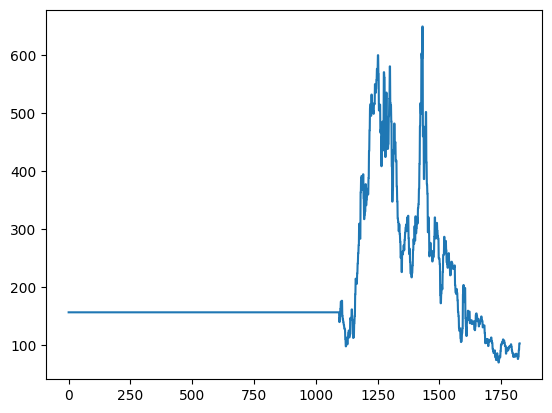

In [16]:
i = 25

plt.plot(market.stocks[i].price_history)

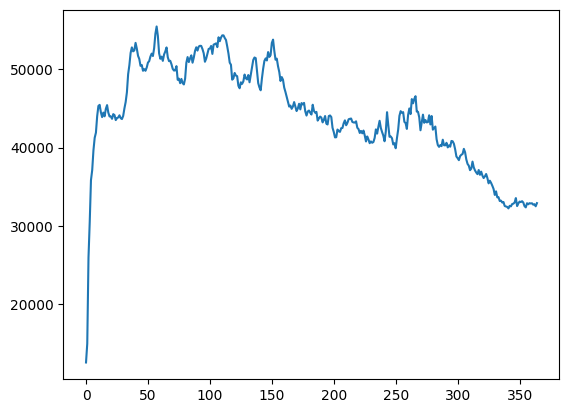

In [ ]:
i = 7

plt.plot(market.participants[i].total_value[-N_TIMESTEPS:])

In [10]:

for i in range(50):
    print(market.stocks[i].earning_value_of_assets, market.stocks[i].quality_of_leadership)

15004.294037063537 0.5559295474573521
4114.402509653597 0.14325133228809406
3340.6166314803418 0.09120784039803265
677.6719432579698 0.02737878857256848
10263.299768490971 0.45742956520133427
5923.098759376091 0.33602893498999653
5479.981871657507 0.6105711080980841
3236.0296708303217 0.924762386758832
978.8233794155886 0.5241650207319828
21355.549025549197 0.6384655128508057
7216.638486662293 0.3521652229760929
16264.61906327512 0.7669569715248218
451.76842483562956 0.013231719361495253
64.87023258237167 0.6940716532439293
3226.0650308140757 0.5628177490393684
16222.075006265804 0.8513801056993371
2370.011991113076 0.12444349421624845
1905.514770626142 0.17668725363379179
4083.3591693516682 0.12384053096425451
16493.162003218433 0.6486538548854731
1066.2331683483278 0.2535322121054082
19331.223239390492 0.8546328260508552
3788.531408711595 0.3312450589399405
10445.705521195197 0.453581420452446
13354.387232334182 0.9074239346544454
6846.396958991055 0.4756639654258329
11839.4145511926